# Home task 


## Task about lakes

- Generate 20 random variable from 1 to 100
- Draw the plot of the  sequence 
- Lets assume each point represent the height and so all plotting is 2d mountains. 
- Then consider the unlimited rain from above - cavities become lakes full of water. 
- Determine the deepest lake

In [24]:
import numpy as np 
import matplotlib.pyplot as plt

In [25]:
np.random.seed(2023)
a = np.random.randint(1,100,20)
a

array([88, 26, 71, 56, 34, 93,  4, 53, 87, 97, 23, 18, 54, 48, 78, 40, 70,
       89,  4, 59])

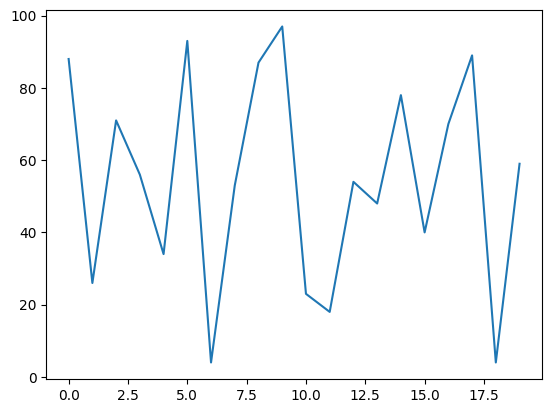

In [26]:
plt.plot (a);

### Expected result

You may present the result by  visualization or numbers that provide information about the boundaries of the lake and its deepest point 

In [27]:
# for i in range(len(a[2:])):
#     print(a[i])
print(a)
print(a[1:-1])

[88 26 71 56 34 93  4 53 87 97 23 18 54 48 78 40 70 89  4 59]
[26 71 56 34 93  4 53 87 97 23 18 54 48 78 40 70 89  4]


In [28]:
bottoms = []
# bottom = 0
# peack = 0
for i in range (len(a[2:])):
    if a[i] > a[i+1] and a[i+1]<a[i+2]:
        # print('bottom ',a[i+1])
        bottoms.append(a[i+1])
print('Bottoms: ',bottoms)

Bottoms:  [26, 34, 4, 18, 48, 40, 4]


In [53]:
peacks = []
# bottom = 0
# peack = 0
for i in range (len(a[2:])):
    if a[i] < a[i+1] and a[i+1]>a[i+2]:
        # print('bottom ',a[i+1])
        peacks.append(a[i+1])
    if i == 0 and a[i]>a[i+1]:#можна тупо лишити тіф самі знаки, і додавати a[i] та a[i+2], але в сети, або ж просто в вайлі зробити ширший крок
        peacks.append(a[i])
    if i+2 == len(a)-1 and a[i+2]>a[i+1]:
        peacks.append(a[i+2])
print('Peacks: ',peacks)

Peacks:  [88, 71, 93, 97, 54, 78, 89, 59]


In [ ]:
r_side = 0
l_side = 0
depth = 0
res_test = []
for i in range(len(a)):
    if a[i] in peacks:
        res_test.append(a[i])
        if len(res_test) == 2:
            if np.min(res_test)>depth:
                depth = np.min(res_test)
            res_test.pop(0)
            

In [54]:
edges = [a[i] for i in range(len(a)) if a[i] in peacks or a[i] in bottoms]
edges

[88, 26, 71, 34, 93, 4, 97, 18, 54, 48, 78, 40, 89, 4, 59]

In [63]:
depth=0
indx_list = []
res_test = []
for i in range(len(a)):
    if a[i] in edges:
        res_test.append(a[i])
        indx_list.append(i)
        if (a[i] == edges[1] and res_test[0]<res_test[1]) or (i == len(a)-1 and res_test[0]>res_test[1]):
            if abs(res_test[0]-res_test[1])>depth:
                depth = abs(res_test[0]-res_test[1])
                #тут має бути запис індексів чи не має бути
        elif len(res_test)==3:
            if np.min(res_test[0],res_test[2])-res_test[1]>depth:
                depth = np.min(res_test[0],res_test[2])
                fin_indx = indx_list.copy()
                res_test = res_test[2]
                indx_list = indx_list[2]

            


        
        


AxisError: axis 71 is out of bounds for array of dimension 0

In [30]:

# a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# # Plot the entire line
# plt.plot(a, label='Entire Line', color='blue')

# # Create a segment with just the data you want to color
# x_segment = range(a[2], a[4])
# y_segment = a[2:4]

# # Plot the segment in red
# plt.plot(x_segment, y_segment, label='Red Segment', color='red')

# # Add labels and legend
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.legend()

# plt.show()


In [50]:
x = range(6,2)
for i in x:
    print(i)

range(2, 4)
[71 56]


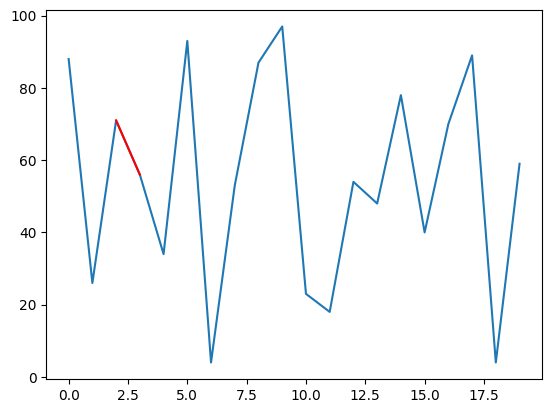

In [52]:
plt.plot (a)
x = range(2,4)
y = a[2:4]
plt.plot (x,y, c='red')
print(x)
print(y)


NameError: name 'res' is not defined

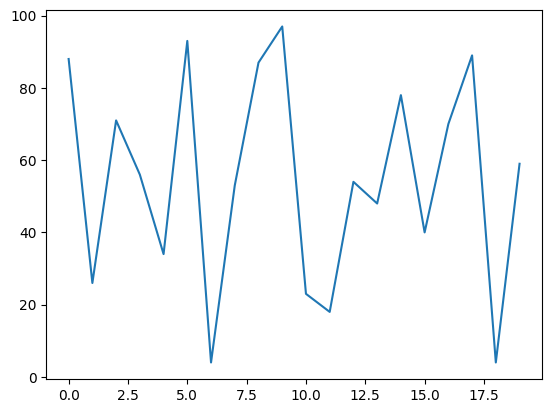

In [7]:
plt.plot (a)
plt.plot (range(res['l'],res['r']),res['lake'], c='red')

## Task about sum and product 

Note: This is optional task. 
However it is also evaluated and so you will get extra points to final score. 
Thus, we encourage you to solve it. 

```
There are two whole numbers:
1 < a,b <100

One scientist("Sum") get provided with sum of numbers,
another  ("Prod") get provided with product of numbers. 
Both scientists know that numbers 1 < a,b <100.

Determine the numbers being based on the following dialog: 
    Prod: I don't know the numbers;
    Sum: I know it;
    Prod: then I know the numbers; 
    Sum: then I know the numbers too.
```